Author : Mohlatlego S. Nakeng

Date created  : 05/03/2019 

Purpose       : Text processing on the ID BOOK/ID CARDS IMAGES for verification and classification.

# Explanation

1. About the model

Multininomial Naive Bayers, useable as (MultinomialNB), is one of the popular Deep Learning/Machine learning Analysis tool for categorical data. I intend to use this model as an approach to image text classification using texts patterns for Natural Language processing.

Applying this model to our dataset will help us improve our current classifications models. Adding the model will assits with ID images, ID cards, Passports, etc for verification.

2. What does the model do?

Document classification is a classical machine learning problem. If there is a set of documents that is already categorized/labeled in existing categories, the task is to automatically categorize a new document into one of the existing categories.

The model helps with words/texts classification, in our case it will help with text recognition for classifications on our documents.

3. Expected results

We intend the model to give feedback of classification analysis of document ID(ID book or ID card:ID), based on texts.We should much be confident within certain accuracy level, judging from the concept,this works as supervised vector machine(SVM), were we pass in texts having expected results. My aim is that, if i pass in texts from  ID BOOK or ID CARD, i expect the machine to return back expected results, ID.ELSE INVLID ID.

# Data Preparation

Data Type

This concept relay on texts characters or texts files.

Importing usable tools for data preparation

In [1]:
import pandas as pd #Loading our dataset

Pandas : is an open free source for python programming launguage for data manipulation and analyis. It provides data structures and operations for manipulating numerical tables and time series. It is often regarded as the powerful Python data analysis Toolkit. 
https://pandas.pydata.org/pandas-docs/stable/

>About the dataset.

To load into our train data, we first have to convert our texts-image datasets into much supportable format,I used spreadshet file instead of subfolders, since our dataset is too small as in vocubulary amount of texts based on image documents texts.

By using text extraction methods - google-OCR(google-optical character recognition)

The OCR method that worked efficiently and provided was the Google OCR. And has been processed already. For us to get the data, we pulled out preferred texts from the SQL database(manually), store them as a txt file.

>>Loading the data

In [2]:
pd.read_excel('text-data.xlsx').head(20) #accesing file by use of pandas module

,ID book,ocr_status,IMAGE_OCR_EXTRACT
0,ID book,1,"Home affairs ,Department Home Affairs,Republic..."
1,ID book,1,"I.D. No 970905 5673 088 S.A. Citizen, Surname ..."
2,ID book,1,1.D.No.771031 0531089\nKREWU\nKREWU\nNOSI CELO...
3,ID book,1,I.D. No. 960511 0867 089\personal particulars\...
4,ID book,1,I.D. No. 920908 0995 08\nNOTICE OF PERSONAL PA...
5,ID book,1,ID No 960502 5714 087\nNOTICE OF PERSONAL PRAT...
6,ID book,1,ID No 960502 5714 087\nNOTICE OF PERSONAL PRAT...
7,ID book,1,ID No 960502 5714 087\nNOTICE OF PERSONAL PRAT...
8,ID book,1,1 D. No. 961026 5982 089\nKHOSA\nCOLBERT HLAMU...
9,ID book,1,ID. No. 961026 5982 089\nNOTICE OF PERSONAL PA...


1. DATA PROCESSING

In [54]:
df= pd.read_excel('text-data.xlsx', header=None)
df.head(5) # header=none helps dummy our categories

,0,1,2
0,ID book,ocr_status,IMAGE_OCR_EXTRACT
1,ID book,1,"Home affairs ,Department Home Affairs,Republic..."
2,ID book,1,"I.D. No 970905 5673 088 S.A. Citizen, Surname ..."
3,ID book,1,1.D.No.771031 0531089\nKREWU\nKREWU\nNOSI CELO...
4,ID book,1,I.D. No. 960511 0867 089\personal particulars\...


In [4]:
df.info() #getting more information about our dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 3 columns):
0    73 non-null object
1    73 non-null object
2    73 non-null object
dtypes: object(3)
memory usage: 1.8+ KB


Looking into our mapping categories, we have 41 texts data from ID documents and 32 texts data from passports documents.

see below,

In [5]:
y = df[0]
y.value_counts() #reading the counts from the doc labels.

ID book      41
Passport     32
Name: 0, dtype: int64

Label enconding

ID = 0

Passport = 1

In [6]:
from sklearn.preprocessing import LabelEncoder
import random #randomizing our dataset for training

In [7]:
L = LabelEncoder() #convert to one-hot array
y_encode = L.fit_transform(y)
random.shuffle(y_encode)

In [8]:
y_encode # this how our label variable will look like, shuffled for random selection.

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0])

# Text Preprocessing

This part is about understanding the nature of our texts, like which words are important, which ones are not.

In [9]:
raw_text = df[2] # 2: IMAGE_ocr_extract column

There are many feature engineering strategies for transforming text data into features. Some involve assigning each unique word-like term to a feature and counting the number of occurrences per training example As a result, each NLP problem requires a tailored approach to determine which terms are relevant and meaningful.

>Normalization

But clearly there's a lot going on here:ID numbers, Address, and gratuitous whitespace and punctuation. Some terms are randomly capitalized, others are in all-caps. Since these terms might show up in any one of the training examples in countless forms, we need a way to ensure each training example is on equal footing via a preprocessing step called normalization.

Instead of removing the following terms, for each training example, let's replace them with a specific string.

.Replace ID No.  with 'idnumber'

.Replace numbers with 'numbr'

In [11]:
processed = raw_text.str.replace(
    r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b',
    'number')

The ID No. or number digits below were replaced by "idnumber"

In [13]:
processed = processed.str.replace(r'[^\w\d\s]', ' ')
processed = processed.str.replace(r'\s+', ' ')
processed = processed.str.replace(r'^\s+|\s+?$', '')

Here, we'll remove all punctuation. In addition, let's collapse all whitespace (spaces, line breaks, tabs) into a single space. Furthermore, we'll eliminate any leading or trailing whitespace.

In [14]:
processed = processed.str.replace(r'[^\w\d\s]', ' ')
processed = processed.str.replace(r'\s+', ' ')
processed = processed.str.replace(r'^\s+|\s+?$', '')
processed = processed.str.replace(r'u003e ', '')
processed = processed.str.replace(r'u003c ', '')
processed = processed.str.replace(r'image_ocr_extract', '')
processed = processed.str.replace(r'\n', ' ')

Here, we lowercase the entire texts

In [15]:
processed = processed.str.lower()

In [16]:
processed.head(20)

0                                     image_ocr_extract
1     home affairs department home affairs republic ...
2     i d no number 088 s a citizen surname mabona f...
3     1 d no 771031 0531089 nkrewu nkrewu nnosi celo...
4     i d no number 089 personal particulars nbe com...
5     i d no number 08 nnotice of personal particula...
6     id no number 087 nnotice of personal praticula...
7     id no number 087 nnotice of personal praticula...
8     id no number 087 nnotice of personal praticula...
9           1 d no number 089 nkhosa ncolbert hlamulo n
10    id no number 089 nnotice of personal particula...
11    republic of south africa nnational identity ca...
12    republic of south africa nnational identity ca...
13    geregistreerde woon en posadres ni d no number...
14    i d no number 08 5 ntana na na malo matumaini ...
15    1 d nonumber 08 5 nmlangeni nlebogang nsouth a...
16    i d no number 088 nsa citizen nce of personal ...
17    om n2008 02 28 ndate issued nony munos n n

From above we can see that we have successfuly removed all spaces, line breaks, tabs and converted our entire texts to lower case.

>>Removing stop Words

What are stop words?

Stop words are such words that are often used in english launguage, words such as ("the", "a", "an", "in", "there").
In natural language processing, useless words (data), are referred to as stop words.
(ref: https://www.geeksforgeeks.org/removing-stop-words-nltk-python/)

In [17]:
import nltk
stop_words = nltk.corpus.stopwords.words('english')

In [18]:
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [19]:
processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in set(stop_words))
)

In [20]:
processed.head(10) #our texts data now with stop words removed.

0                                    image_ocr_extract
1    home affairs department home affairs republic ...
2    number 088 citizen surname mabona forenam emma...
3    1 771031 0531089 nkrewu nkrewu nnosi celo swee...
4    number 089 personal particulars nbe communicat...
5    number 08 nnotice personal particulars ns citi...
6    id number 087 nnotice personal praticulars nho...
7    id number 087 nnotice personal praticulars nho...
8    id number 087 nnotice personal praticulars nho...
9               1 number 089 nkhosa ncolbert hlamulo n
Name: 2, dtype: object

The stop words are successfully removed

In [21]:
import re
from nltk.stem import PorterStemmer
porter = PorterStemmer()
def preprocess_text(messy_string):
    assert(type(messy_string) == str)
    cleaned = re.sub(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'email', messy_string)
    cleaned = re.sub(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr',
                     cleaned)
    cleaned = re.sub(r'£|\$', 'moneysymb', cleaned)
    cleaned = re.sub(
        r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b',
        'idnumbr', cleaned)
    cleaned = re.sub(r'\d+(\.\d+)?', 'numbr', cleaned)
    cleaned = re.sub(r'[^\w\d\s]', ' ', cleaned)
    cleaned = re.sub(r'\s+', ' ', cleaned)
    cleaned = re.sub(r'^\s+|\s+?$', '', cleaned.lower())
    return ' '.join(
        porter.stem(term) 
        for term in cleaned.split()
        if term not in set(stop_words)
    )


# Feature engineering

Tokenization

Tokens, are usually individual words (in languages like English) and "tokenization" is taking a text or set of text and breaking it up into its individual words. These tokens are then used as the input for other types of analysis or tasks, like parsing (automatically tagging the syntactic relationship between words).

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_ngrams = vectorizer.fit_transform(processed)

>Key words extraction

We use the Tfidfvectorizer from Scikit-learn for extraction of keywords in our text data

TfidfVectorizer:
 Its function is  to convert a collection of raw documents or texts to a matrix of TF -IDF features
 >TF -IDF features
 
Tfidf gives more information,like how important a word is to the doc label with respect to the corpus.

-TF(Term frequency): it measures the amount of times a particular word appears in a single document.

- IDF(Inverse Document Frequency):
It helps us identify rare words, by providing us with the weights measurements. The lesser the word appears on a documnets the more weight it carries.

In [23]:
X_ngrams.shape

(73, 2846)

About the model

Naive Bayes classifier for multinomial models

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally needs integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB



X_train, X_test, y_train, y_test = train_test_split(
    X_ngrams,
    y_encode,
    test_size=0.5,
    random_state=42,
    stratify=y_encode
)

model= MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

Model Accuracy

In [67]:
print('The model accuracy is at:',accuracy_score(y_train, y_pred)*100, '%') #reading out the accuracy counts.

The model accuracy is at: 94.44444444444444 %


Confusison Matrice, for support analysis

In [53]:
pd.DataFrame(
    confusion_matrix(y_train, y_pred),
    index=[['actual', 'actual'], ['ID book', 'Passport']],
    columns=[['predicted', 'predicted'], ['ID book', 'Passport']]
)

predicted         
                  ID book Passport
actual ID book         20        0
       Passport         2       14

Confusion matrix analysis Explained

TN: True Negative = 20
    
FP: False Positives= 0
    
FN: False Negatives = 2
    
TP: True Positives = 14

Interpretation:

From the confusion matrice output information:
We found that,we had sucessfully  trained n=36 group of texts, that is 50% of our data.
Within 36 trained data, 20 were prediceted as IDs. 14 were correctly predicted as not IDs.

In [28]:
from sklearn.model_selection import learning_curve, GridSearchCV, StratifiedShuffleSplit, cross_val_score
import numpy as np


In [29]:
param_grid = [{'C': np.logspace(-4, 4, 20)}]

grid_search = GridSearchCV(
    estimator=svm.LinearSVC(loss='hinge'),
    param_grid=param_grid,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=42),
    scoring='f1',
    n_jobs=5
)


In [30]:
grid_search.fit(X_ngrams, y_encode)
final_clf = MultinomialNB()
final_clf.fit(X_ngrams, y_encode);

C:\Users\MohlatlegoN\.conda\envs\scikit-learn\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The Vectorizer

In [31]:
pd.Series(
    final_clf.coef_.T.ravel(),
    index=vectorizer.get_feature_names()
).sort_values(ascending=False)[:10]

birth          -7.225876
ndate          -7.382677
republic       -7.390404
number         -7.396392
africa         -7.412280
affairs        -7.463939
date           -7.493411
south africa   -7.496588
nand           -7.499612
south          -7.508061
dtype: float64

Binary decision making:

In [32]:
def doc_filter(DOC):
    if final_clf.predict(vectorizer.transform([preprocess_text(DOC)])):
        return 'ID'
    else:
        return 'invalid_ID'

# Testing

Test image

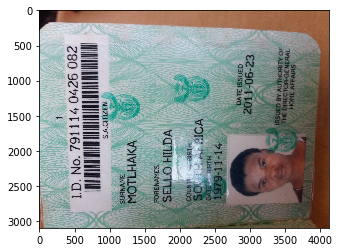

In [215]:
import matplotlib.image as MI 
import matplotlib.pyplot as plt 
ID = MI.imread('./278.jpg')
plt.imshow(ID, cmap='Set3') 
plt.show()

Below is the texts data pulled from the database for this particular image.

In [56]:
Text ='ID No. 79 1114 0426 082\r\nS.A citizen\r\nsurname:\r\nMotlhaka\r\nforenames:\r\nSello Helda\r\nCountry of birth:\r\nSouth Africa\r\nDate of birth;\r\n1979-11-14\r\nDate issued:\r\n2011-06-23\r\nIssued by authority of the director-general home affairs.'

In [57]:
Text

'ID No. 79 1114 0426 082\r\nS.A citizen\r\nsurname:\r\nMotlhaka\r\nforenames:\r\nSello Helda\r\nCountry of birth:\r\nSouth Africa\r\nDate of birth;\r\n1979-11-14\r\nDate issued:\r\n2011-06-23\r\nIssued by authority of the director-general home affairs.'

In [58]:
doc_filter(Text)

'ID'

Testing with the texts not from an ID 

In [59]:
doc_filter('Temporary permit. Permission is hereby granted to the following person as hoor of personal particulars of holder, surname: Bekore, name: Menoistu Wolde. Date of birth 21/10/19787. Nationality of Ethopia.The holder of the permit may reside temporaly in the Republic of Soumn Aho o p pose of Refugees Act No. 130 of 1998. The permit holder shall without expenses to the state, leave the Republic on beton 10012019, such later date as duly authorised by a Refugee Status Determ on icerisher application for anyone. The permit entities the holder to .Failure to comply with the conditions of this permit will be dealt of Section 37 and Second of the Refugees Act 1998. All permit holder are obliged to respect the laws of South Africa. This permit will lapse if the permit holder does not appear in person as required at the designed Refugee Reconomic nor if he/she departs from the Republic without prior authorisation to the Director General. All other permits issued prior to the issuance of this permit are automatically nulled. Other conditions.')

'invalid_ID'

In [60]:
doc_filter('om\n2008-02-28\nDATE ISSUED\nONY MUNOS\n????n nivo\n80-II-0661\nV JV-ains\nHUOMIOONO DISIO\nKAO POSKADORESS\nMPHO VERONICA\nDEPARTEVENT VAN\nVOORNAMENORENAMES\nDowd\nwood\nNOWSOYD\nNUSUN\nISINOS\nMYANMA\n",')

'invalid_ID'

In [61]:
doc_filter('ID No. 79 1114 0426 082\r\nS.A citizen\r\nsurname:\r\nMotlhaka\r\nforenames:\r\nSello Helda\r\nCountry of birth:\r\nSouth Africa\r\nDate of birth;\r\n1979-11-14\r\nDate issued:\r\n2011-06-23\r\nIssued by authority of the director-general home affairs.')

'ID'

In [62]:
doc_filter('i am a roobot 2.0')

'invalid_ID'

In [63]:
doc_filter('npassport')

'invalid_ID'

In [64]:
doc_filter('identity document')

'invalid_ID'

# Savinig the model

In [65]:
from joblib import dump

In [66]:
model_name = './models/text_clf.joblib'
dump(model,model_name)

['./models/text_clf.joblib']